## SETUP AND LIBRARIES

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random
import os
import copy
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.integrate import simps
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import simps
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [70]:
# Ore data from the image
ore_data_list = [(15, 130848), (17, 128592), (19, 157920), (21, 180480), (23, 254928), (25, 275232),
    (27, 348160), (29, 564000), (31, 789600), (33, 726432), (35, 815200), (37, 880960),
    (39, 858800), (41, 820400), (43, 757280), (45, 630848), (47, 557920), (49, 380480),
    (51, 210880), (53, 238400), (55, 104560), (57, 106080), (59, 82000)]

# Create a dictionary for ore data (grade: tonnage)
ore_data = {grade: ton for grade, ton in ore_data_list}

<img src="flow_chart.png" width="1200" alt="FLOW CHART">

- <font color="red">**Variable Mining Unit Costs:**</font> Mining unit costs are adjusted based on different mining capacities, reflecting economies of scale and potential cost increases.
- <font color="red">**Yield Values:**</font> Yield values change depending on the ore grade, accounting for varying ore characteristics and processing efficiencies.
- <font color="red">**Variable Processing Costs:**</font> Processing costs are adjusted based on the ore grade, reflecting variations in processing requirements and cost per ton processed.
- <font color="red">**Fluctuating Product Selling Prices:**</font> The project incorporates varying product selling prices to account for market volatility and price fluctuations.
- <font color="red">**Variable Investment Costs:**</font> Investment costs are calculated for different plant capacities, reflecting the investment required for equipment, infrastructure, and other fixed assets.
- <font color="red">**Loan Repayment:**</font> Loan repayment schedules are integrated for the plant investment, simulating the impact of debt financing on cash flow.

<img src="newplot.png" width="1000" alt="FLOW CHART">

In [3]:
# Get annual production tonnage from the user with error handling
while True:
    try:
        initial_annual_production_ton = int(input("Enter annual production tonnage (500,000 - 2,000,000): "))
        if not 500000 <= initial_annual_production_ton <= 2000000:
            raise ValueError("Production tonnage must be between 500,000 and 2,000,000.")
        break
    except ValueError as e:
        print(f"Invalid input: {e}")

Enter annual production tonnage (500,000 - 2,000,000):  500000


## ANNUAL ORE GRADE TO BE PRODUCED
---

In [24]:
# Initial total tonnage
total_ton = sum(ore_data.values())

# Define production years
years_of_production = total_ton // initial_annual_production_ton
last_year_production_ton = total_ton % initial_annual_production_ton

# Create a list to store the results
results = []

# Define functions
def random_selection(ore_data, required_ton):
    selected_ores = []
    remaining_ton = required_ton

    while remaining_ton > 0 and ore_data:
        possible_grades = [grade for grade in ore_data if ore_data[grade] > 0]
        if not possible_grades:
            break
        grade = random.choice(possible_grades)
        ore_ton = ore_data[grade]
        tonnage_to_use = min(remaining_ton, ore_ton)

        if tonnage_to_use > 0:
            selected_ores.append((grade, tonnage_to_use))
            remaining_ton -= tonnage_to_use
            ore_data[grade] -= tonnage_to_use
            if ore_data[grade] == 0:
                del ore_data[grade]

    return selected_ores

def calculate_average_grade(selected_ores):
    total_ton = sum(ton for grade, ton in selected_ores)
    weighted_sum = sum(grade * ton for grade, ton in selected_ores)
    return weighted_sum / total_ton if total_ton else 0
    
remaining_ore_data = copy.deepcopy(ore_data)
grade_usage = {grade: [] for grade in ore_data.keys()}

for year in range(1, years_of_production + 2):
    if year == years_of_production + 1 and last_year_production_ton != 0:
        annual_production_ton = last_year_production_ton
    else:
        annual_production_ton = initial_annual_production_ton

        selected_ores = random_selection(remaining_ore_data, annual_production_ton)
        average_grade = calculate_average_grade(selected_ores)
    if selected_ores:
        results.append((year, annual_production_ton, round(average_grade, 1), selected_ores))

    for grade, ton in selected_ores:
        if grade in grade_usage:
            grade_usage[grade].append((year, ton))

df_results = pd.DataFrame(results, columns=["Year", "Annual Production (ton)", "Average Grade %", "Selected Ores"])
df_results['Annual Production (ton)'] = df_results['Annual Production (ton)'].apply(lambda x: "{:,}".format(x).replace(",", "."))
pd.set_option('display.max_colwidth', None)
df_results

,Year,Annual Production (ton),Average Grade %,Selected Ores
0,1,500.000,28.2,"[(27, 348160), (31, 151840)]"
1,2,500.000,33.0,"[(33, 500000)]"
2,3,500.000,37.0,"[(37, 500000)]"
3,4,500.000,26.8,"[(25, 275232), (29, 224768)]"
4,5,500.000,43.0,"[(43, 500000)]"
5,6,500.000,45.0,"[(45, 500000)]"
6,7,500.000,46.1,"[(49, 380480), (37, 119520)]"
7,8,500.000,23.8,"[(23, 254928), (21, 180480), (35, 64592)]"
8,9,500.000,41.1,"[(53, 238400), (17, 128592), (43, 133008)]"
9,10,500.000,38.0,"[(37, 261440), (39, 238560)]"


## PRODUCT QUANTITY
---

In [25]:
def calculate_yield(grade):
    return (-0.0004 * (grade ** 3)) + (0.0461 * (grade ** 2)) - (0.1765 * grade) + 0.72

def calculate_product(annual_ton, average_grade):
    yield_value = calculate_yield(average_grade) / 100  # Yield değeri zaten yüzde olarak hesaplanıyor
    product = annual_ton * yield_value
    return product

def calculate_cost(grade):
    return 0.1 * grade + 3.7

def calculate_mining_cost(annual_production):
    return (((-0.1 * (annual_production/100000)) + 8.5) * annual_production)

product_results = []

for year, annual_production_ton, average_grade, selected_ores in results:
    yield_value = calculate_yield(average_grade) / 100
    product = calculate_product(annual_production_ton, average_grade)
    p_cost = calculate_cost(average_grade) * product
    mining_cost = calculate_mining_cost(annual_production_ton)
    product_results.append((year, annual_production_ton, round(average_grade, 1), round(yield_value * 100, 1), int(product), int(p_cost), int(mining_cost)))

df_product_results = pd.DataFrame(product_results, columns=["Year", "Annual Production (ton)", "Average Grade %", "Yield (%)", "Product Quantity (ton)", "Processing Cost", "Mining Cost"])

df_product_results["Annual Production (ton)"] = df_product_results["Annual Production (ton)"].apply(lambda x: "{:,}".format(x).replace(",", "."))
df_product_results["Product Quantity (ton)"] = df_product_results["Product Quantity (ton)"].apply(lambda x: "{:,}".format(x).replace(",", "."))
df_product_results["Processing Cost"] = df_product_results["Processing Cost"].apply(lambda x: "${:,}".format(x).replace(",", "."))
df_product_results["Mining Cost"] = df_product_results["Mining Cost"].apply(lambda x: "${:,}".format(x).replace(",", "."))

total_waste_rock_cost = 15000000  # USD
number_of_years = df_product_results.shape[0]
waste_rock_cost_per_year = total_waste_rock_cost / number_of_years

df_product_results["Waste Rock Cost"] = waste_rock_cost_per_year
df_product_results["Waste Rock Cost"] = df_product_results["Waste Rock Cost"].apply(lambda x: "${:,}".format(int(x)).replace(",", "."))

pd.set_option("display.max_colwidth", None)
df_product_results

,Year,Annual Production (ton),Average Grade %,Yield (%),Product Quantity (ton),Processing Cost,Mining Cost,Waste Rock Cost
0,1,500.000,28.2,23.4,117.164,$763.914,$4.000.000,$750.000
1,2,500.000,33.0,30.7,153.617,$1.075.325,$4.000.000,$750.000
2,3,500.000,37.0,37.0,185.195,$1.370.450,$4.000.000,$750.000
3,4,500.000,26.8,21.4,107.005,$682.696,$4.000.000,$750.000
4,5,500.000,43.0,46.6,232.832,$1.862.663,$4.000.000,$750.000
5,6,500.000,45.0,49.7,248.400,$2.036.879,$4.000.000,$750.000
6,7,500.000,46.1,51.4,256.833,$2.134.284,$4.000.000,$750.000
7,8,500.000,23.8,17.2,86.198,$524.086,$4.000.000,$750.000
8,9,500.000,41.1,43.6,217.839,$1.701.323,$4.000.000,$750.000
9,10,500.000,38.0,38.6,193.162,$1.448.722,$4.000.000,$750.000


## REVENUE
---

In [26]:
ore_prices = [70, 75, 82, 88, 96, 112, 125, 120, 118, 115, 120, 92, 110, 88, 115, 100, 110, 92, 90, 118]

def calculate_revenue(product_amounts, ore_prices):
    revenue_results = []
    total_revenue = 0
    for i, (year, annual_production_ton, avg_grade, yield_percentage, product_amount, _, _) in enumerate(product_amounts):
        price = ore_prices[i % len(ore_prices)]
        revenue = product_amount * price
        total_revenue += revenue
        revenue_results.append((year, round(avg_grade, 1), round(yield_percentage, 1), int(product_amount), int(revenue)))
    return revenue_results, total_revenue

revenue_results, total_revenue = calculate_revenue(product_results, ore_prices)

df_revenue_results = pd.DataFrame(revenue_results, columns=["Year", "Average Grade %", "Yield (%)", "Product Quantity (ton)", "Revenue (USD)"])

df_revenue_results['Product Quantity (ton)'] = df_revenue_results['Product Quantity (ton)'].apply(lambda x: "{:,}".format(x).replace(",", "."))
df_revenue_results['Revenue (USD)'] = df_revenue_results['Revenue (USD)'].apply(lambda x: "{:,}".format(x).replace(",", "."))
pd.set_option('display.max_colwidth', None)
df_revenue_results

,Year,Average Grade %,Yield (%),Product Quantity (ton),Revenue (USD)
0,1,28.2,23.4,117.164,8.201.480
1,2,33.0,30.7,153.617,11.521.275
2,3,37.0,37.0,185.195,15.185.990
3,4,26.8,21.4,107.005,9.416.440
4,5,43.0,46.6,232.832,22.351.872
5,6,45.0,49.7,248.400,27.820.800
6,7,46.1,51.4,256.833,32.104.125
7,8,23.8,17.2,86.198,10.343.760
8,9,41.1,43.6,217.839,25.705.002
9,10,38.0,38.6,193.162,22.213.630


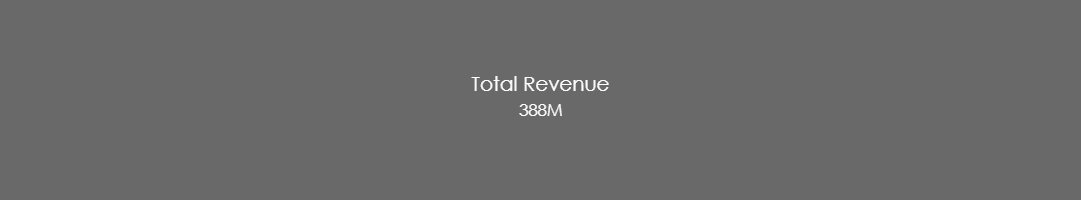

In [27]:
tr_fig = go.Figure()
tr_fig.add_trace(go.Indicator(mode="number", value=total_revenue, title={"text": "Total Revenue"}))
tr_fig.update_layout(
    height=200,
    width=1000,
    paper_bgcolor="dimgray",
    plot_bgcolor="black",
    font=dict(family="Century Gothic, Bold", color="white", size=20))
tr_fig.show()

## INVESTMENT AMOUNT FOR BENEFICIATION PLANT
---

In [28]:
def calculate_new_investment_cost(existing_cost, existing_capacity, factor=0.6):
    new_cost = existing_cost * (initial_annual_production_ton / existing_capacity) ** factor
    return new_cost
    """
    Calculate the new investment cost using the six-tenths factor rule.
    
    :param existing_cost: Existing investment cost (C1)
    :param existing_capacity: Existing capacity (Q1)
    :param new_capacity: New capacity (Q2)
    :param factor: Six-tenths factor (default is 0.6)
    :return: New investment cost (C2)
    """
existing_investment_cost = 10000000  # Existing investment cost (USD)
existing_capacity = 500000  # Existing capacity
new_investment_cost = calculate_new_investment_cost(existing_investment_cost, existing_capacity)

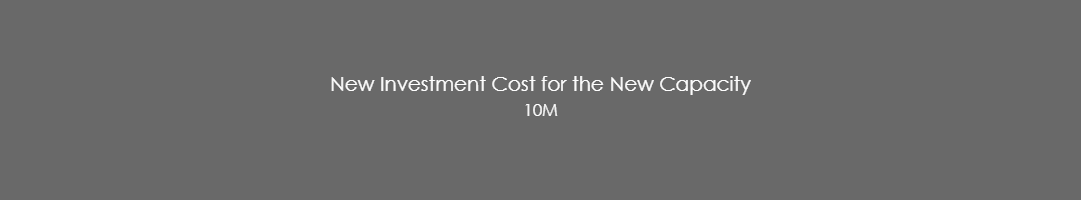

In [29]:
invest_fig = go.Figure()
invest_fig.add_trace(go.Indicator(mode="number", value=new_investment_cost, title={"text": "New Investment Cost for the New Capacity"}))
invest_fig.update_layout(
    height=200,
    width=1000,
    paper_bgcolor="dimgray",
    plot_bgcolor="black",
    font=dict(family="Century Gothic, Bold", color="white", size=20)
)
invest_fig.show()

## PLANT LOAN REPAYMENT AMOUNTS
---

In [30]:
def calculate_annual_payment(principal, annual_interest_rate, years):
    r = annual_interest_rate / 100
    n = years
    annual_payment = (principal * r) / (1 - (1 + r) ** -n)
    return annual_payment

principal = new_investment_cost  # new investment cost
annual_interest_rate = 5  # Annual interest rate (%)
years = 4  # Loan term (years)
annual_payment = calculate_annual_payment(new_investment_cost, annual_interest_rate, years)

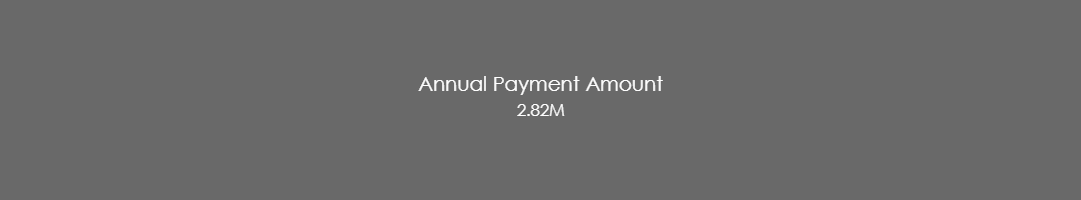

In [31]:
ap_fig = go.Figure()
ap_fig.add_trace(go.Indicator(mode="number", value=annual_payment, title={"text": "Annual Payment Amount"}))
ap_fig.update_layout(
    height=200,
    width=1000,
    paper_bgcolor="dimgray",
    plot_bgcolor="black",
    font=dict(family="Century Gothic, Bold", color="white", size=20)
)
ap_fig.show()

## NET INCOME
---

In [32]:
# Clean and convert 'Revenue (USD)' to float
# df_net_income_results['Revenue (USD)'] = df_net_income_results['Revenue (USD)'].astype(str).apply(lambda x: x.replace('.', '').replace(',', '.')).astype(float)

# Other columns conversion
processing_costs = df_product_results['Processing Cost'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(float).tolist()
mining_costs = df_product_results['Mining Cost'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(float).tolist()
waste_rock_costs = df_product_results['Waste Rock Cost'].str.replace('$', '').str.replace('.', '').str.replace(',', '.').astype(float).tolist()

# Calculate net income
net_income_results = []
for i, (year, avg_grade, yield_percentage, product_amount, revenue) in enumerate(revenue_results):
    net_income = revenue - annual_payment - processing_costs[i] - mining_costs[i] - waste_rock_costs[i] if i < 4 else revenue - processing_costs[i] - mining_costs[i] - waste_rock_costs[i]
    net_income_results.append((
        year, avg_grade, yield_percentage, product_amount, revenue,
        int(annual_payment) if i < 4 else 0,
        int(processing_costs[i]), int(mining_costs[i]), int(waste_rock_costs[i]), 
        int(net_income)
    ))

df_net_income_results = pd.DataFrame(net_income_results, columns=[
    "Year", "Average Grade %", "Yield (%)", "Product Quantity (ton)", "Revenue (USD)", 
    "Annual Payment", "Processing Cost", "Mining Cost", "Waste Rock Cost", "Net Income (USD)"
])

# Formatting with apply and format function
df_net_income_results['Product Quantity (ton)'] = df_net_income_results['Product Quantity (ton)'].apply(lambda x: "{:,}".format(int(x)).replace(",", "."))
df_net_income_results['Revenue (USD)'] = df_net_income_results['Revenue (USD)'].apply(lambda x: "{:,}".format(int(x)).replace(",", "."))
df_net_income_results['Annual Payment'] = df_net_income_results['Annual Payment'].apply(lambda x: "{:,}".format(int(x)).replace(",", "."))
df_net_income_results['Processing Cost'] = df_net_income_results['Processing Cost'].apply(lambda x: "{:,}".format(int(x)).replace(",", "."))
df_net_income_results['Mining Cost'] = df_net_income_results['Mining Cost'].apply(lambda x: "{:,}".format(int(x)).replace(",", "."))
df_net_income_results['Waste Rock Cost'] = df_net_income_results['Waste Rock Cost'].apply(lambda x: "{:,}".format(int(x)).replace(",", "."))
df_net_income_results['Net Income (USD)'] = df_net_income_results['Net Income (USD)'].apply(lambda x: "{:,}".format(int(x)).replace(",", "."))

# Calculate total net income (no need for string conversion)
total_net_income = df_net_income_results['Net Income (USD)'].str.replace('.', '').str.replace(',', '.').astype(float).sum()
pd.set_option('display.max_colwidth', None)
df_net_income_results

,Year,Average Grade %,Yield (%),Product Quantity (ton),Revenue (USD),Annual Payment,Processing Cost,Mining Cost,Waste Rock Cost,Net Income (USD)
0,1,28.2,23.4,117.164,8.201.480,2.820.118,763.914,4.000.000,750.000,-132.552
1,2,33.0,30.7,153.617,11.521.275,2.820.118,1.075.325,4.000.000,750.000,2.875.831
2,3,37.0,37.0,185.195,15.185.990,2.820.118,1.370.450,4.000.000,750.000,6.245.421
3,4,26.8,21.4,107.005,9.416.440,2.820.118,682.696,4.000.000,750.000,1.163.625
4,5,43.0,46.6,232.832,22.351.872,0,1.862.663,4.000.000,750.000,15.739.209
5,6,45.0,49.7,248.400,27.820.800,0,2.036.879,4.000.000,750.000,21.033.921
6,7,46.1,51.4,256.833,32.104.125,0,2.134.284,4.000.000,750.000,25.219.841
7,8,23.8,17.2,86.198,10.343.760,0,524.086,4.000.000,750.000,5.069.674
8,9,41.1,43.6,217.839,25.705.002,0,1.701.323,4.000.000,750.000,19.253.679
9,10,38.0,38.6,193.162,22.213.630,0,1.448.722,4.000.000,750.000,16.014.908


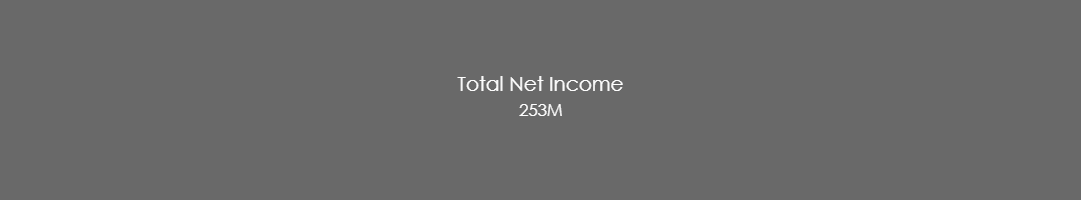

In [33]:
tni_fig = go.Figure(); tni_fig.add_trace(go.Indicator(mode="number", value=total_net_income,
title={"text": "Total Net Income"})); tni_fig.update_layout(height=200, width=1000, paper_bgcolor="dimgray",
plot_bgcolor="black", font=dict(family="Century Gothic, Bold", color="white", size=20)); tni_fig.show()

## NET PRESENT VALUE
---

In [34]:
npv = 0
discount_rate = 0.1  # Define your discount rate here

for i in range(len(df_net_income_results)):
    discounted_net_income = float(df_net_income_results["Net Income (USD)"][i].replace('.', ''))
    npv += discounted_net_income / (1 + discount_rate) ** (i + 1)

net_present_value = npv - new_investment_cost

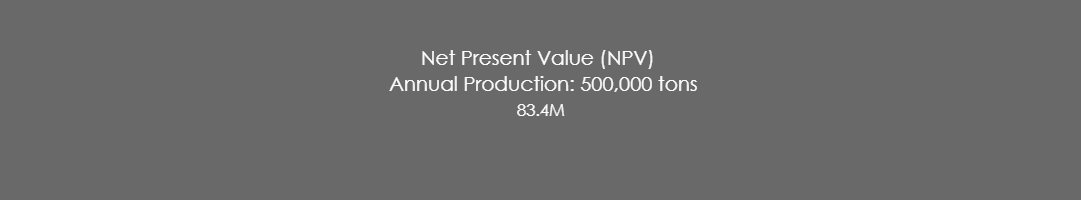

In [35]:
npv_fig = go.Figure(); npv_fig.add_trace(go.Indicator(mode="number", value=net_present_value,
title={"text": f"Net Present Value (NPV) <br> Annual Production: {initial_annual_production_ton:,} tons"})); 
npv_fig.update_layout(height=200, width=1000, paper_bgcolor="dimgray", plot_bgcolor="black", font=dict(family="Century Gothic, Bold", color="white", size=20)); npv_fig.show()

## MONTE CARLO SIMULATION OF NPV
---
Determining the maximum, minimum, and average NPV values generated by running 10,000 iterations with randomly selected grade ranges from the database, holding the annual production figure constant at 500,000 tonnes.

In [36]:
ore_data_list = [
    (15, 130848), (17, 128592), (19, 157920), (21, 180480), (23, 254928), (25, 275232),
    (27, 348160), (29, 564000), (31, 789600), (33, 726432), (35, 815200), (37, 880960),
    (39, 858800), (41, 820400), (43, 757280), (45, 630848), (47, 557920), (49, 380480),
    (51, 210880), (53, 238400), (55, 104560), (57, 106080), (59, 82000)
]

ore_data = {grade: ton for grade, ton in ore_data_list}

def random_selection(ore_data, required_ton):
    selected_ores = []
    remaining_ton = required_ton

    while remaining_ton > 0 and ore_data:
        possible_grades = [grade for grade in ore_data if ore_data[grade] > 0]
        if not possible_grades:
            break
        grade = random.choice(possible_grades)
        ore_ton = ore_data[grade]
        tonnage_to_use = min(remaining_ton, ore_ton)

        if tonnage_to_use > 0:
            selected_ores.append((grade, tonnage_to_use))
            remaining_ton -= tonnage_to_use
            ore_data[grade] -= tonnage_to_use
            if ore_data[grade] == 0:
                del ore_data[grade]

    return selected_ores

def calculate_average_grade(selected_ores):
    total_ton = sum(ton for grade, ton in selected_ores)
    weighted_sum = sum(grade * ton for grade, ton in selected_ores)
    return weighted_sum / total_ton if total_ton else 0

def calculate_yield(grade):
    return (-0.0004 * (grade ** 3)) + (0.0461 * (grade ** 2)) - (0.1765 * grade) + 0.72

def calculate_product(annual_ton, average_grade):
    yield_value = calculate_yield(average_grade) / 100
    product = annual_ton * yield_value
    return product

def calculate_cost(grade):
    return 0.1 * grade + 3.7

def calculate_mining_cost(annual_production):
    return (((-0.1 * (annual_production / 100000)) + 8.5) * annual_production)

def calculate_revenue(product_amounts, ore_prices):
    revenue_results = []
    total_revenue = 0
    for i, (year, annual_production_ton, avg_grade, yield_percentage, product_amount, _, _) in enumerate(product_amounts):
        price = ore_prices[i % len(ore_prices)]
        revenue = product_amount * price
        total_revenue += revenue
        revenue_results.append((year, round(avg_grade, 1), round(yield_percentage, 1), int(product_amount), int(revenue)))
    return revenue_results, total_revenue

def calculate_new_investment_cost(existing_cost, existing_capacity, initial_annual_production_ton, factor=0.6):
    new_cost = existing_cost * (initial_annual_production_ton / existing_capacity) ** factor
    return new_cost

def calculate_annual_payment(principal, annual_interest_rate, years):
    r = annual_interest_rate / 100
    n = years
    annual_payment = (principal * r) / (1 - (1 + r) ** -n)
    return annual_payment

def calculate_npv_for_production_ton(initial_annual_production_ton):
    ore_data_copy = copy.deepcopy(ore_data)
    total_ton = sum(ore_data_copy.values())
    years_of_production = total_ton // initial_annual_production_ton
    last_year_production_ton = total_ton % initial_annual_production_ton
    results = []

    for year in range(1, years_of_production + 2):
        if year == years_of_production + 1 and last_year_production_ton != 0:
            annual_production_ton = last_year_production_ton
        else:
            annual_production_ton = initial_annual_production_ton

        selected_ores = random_selection(ore_data_copy, annual_production_ton)
        average_grade = calculate_average_grade(selected_ores)
        if selected_ores:
            results.append((year, annual_production_ton, round(average_grade, 1)))

    product_results = []

    for year, annual_production_ton, average_grade in results:
        yield_value = calculate_yield(average_grade) / 100
        product = calculate_product(annual_production_ton, average_grade)
        p_cost = calculate_cost(average_grade) * product
        mining_cost = calculate_mining_cost(annual_production_ton)
        product_results.append((year, annual_production_ton, round(average_grade, 1), round(yield_value * 100, 1), int(product), int(p_cost), int(mining_cost)))

    ore_prices = [70, 75, 82, 88, 96, 112, 125, 120, 118, 115, 120, 92, 110, 88, 115, 100, 110, 92, 90, 118]
    revenue_results, total_revenue = calculate_revenue(product_results, ore_prices)

    existing_investment_cost = 10000000
    existing_capacity = 500000
    new_investment_cost = calculate_new_investment_cost(existing_investment_cost, existing_capacity, initial_annual_production_ton)

    principal = new_investment_cost
    annual_interest_rate = 5
    years = 4
    annual_payment = calculate_annual_payment(new_investment_cost, annual_interest_rate, years)

    processing_costs = [p_cost for _, _, _, _, _, p_cost, _ in product_results]
    mining_costs = [m_cost for _, _, _, _, _, _, m_cost in product_results]
    waste_rock_costs = [15000000 / len(product_results)] * len(product_results)

    net_income_results = []
    for i, (year, avg_grade, yield_percentage, product_amount, revenue) in enumerate(revenue_results):
        net_income = revenue - annual_payment - processing_costs[i] - mining_costs[i] - waste_rock_costs[i] if i < 4 else revenue - processing_costs[i] - mining_costs[i] - waste_rock_costs[i]
        net_income_results.append((year, avg_grade, yield_percentage, product_amount, revenue, int(net_income)))

    npv = 0
    discount_rate = 0.1

    for i in range(len(net_income_results)):
        discounted_net_income = net_income_results[i][5]
        npv += discounted_net_income / (1 + discount_rate) ** (i + 1)

    net_present_value = npv - new_investment_cost
    return net_present_value

# Production ton value
initial_annual_production_ton = 500000
npv_trials = []

num_trials = 10000

for _ in range(num_trials):
    npv = calculate_npv_for_production_ton(initial_annual_production_ton)
    npv_trials.append(npv)

min_npv = np.min(npv_trials)
max_npv = np.max(npv_trials)
mean_npv = np.mean(npv_trials)

min_npv = np.min(npv_trials)
max_npv = np.max(npv_trials)
mean_npv = np.mean(npv_trials)

-------------------------------
Minimum NPV: 68,249,916
Maximum NPV: 97,665,922
Mean NPV: 83,620,693
-------------------------------


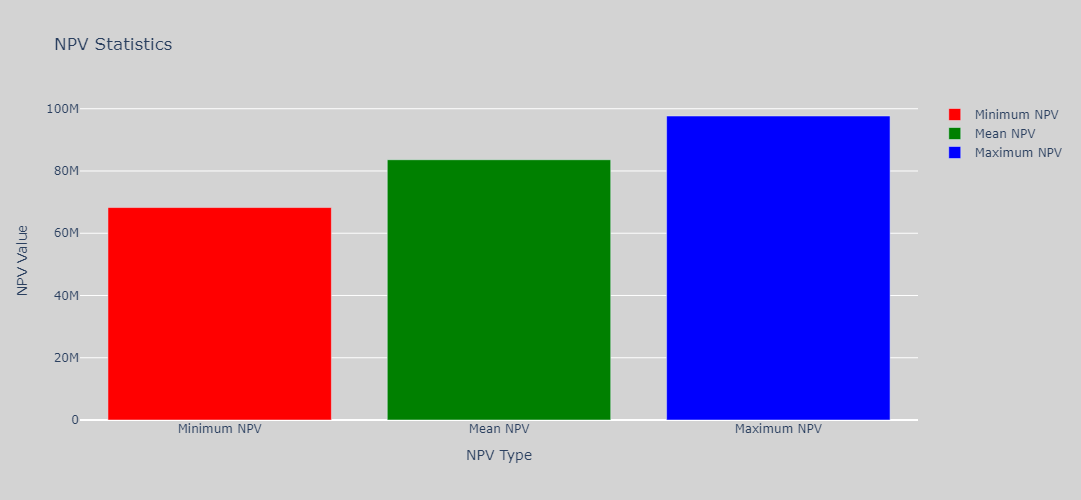

In [37]:
print("-------------------------------")
print(f"Minimum NPV: {min_npv:,.0f}")
print(f"Maximum NPV: {max_npv:,.0f}")
print(f"Mean NPV: {mean_npv:,.0f}")
print("-------------------------------")

fig = go.Figure()
fig.add_trace(go.Bar(x=['Minimum NPV'], y=[min_npv], name='Minimum NPV', marker_color='red'))
fig.add_trace(go.Bar(x=['Mean NPV'], y=[mean_npv], name='Mean NPV', marker_color='green'))
fig.add_trace(go.Bar(x=['Maximum NPV'], y=[max_npv], name='Maximum NPV', marker_color='blue'))
fig.update_layout(title='NPV Statistics', xaxis_title='NPV Type', yaxis_title='NPV Value', barmode='group', plot_bgcolor='lightgrey', paper_bgcolor='lightgrey', width=1000, height=500)
fig.show()

## BREAK EVEN CUT OFF GRADES
---
<img src="becog.jpg" width="1000" alt="BREAK EVEN CUT OFF GRADES">

-------------------------------
Minimum değer: 15.32
Maksimum değer: 22.29
Ortalama değer: 17.6525
-------------------------------


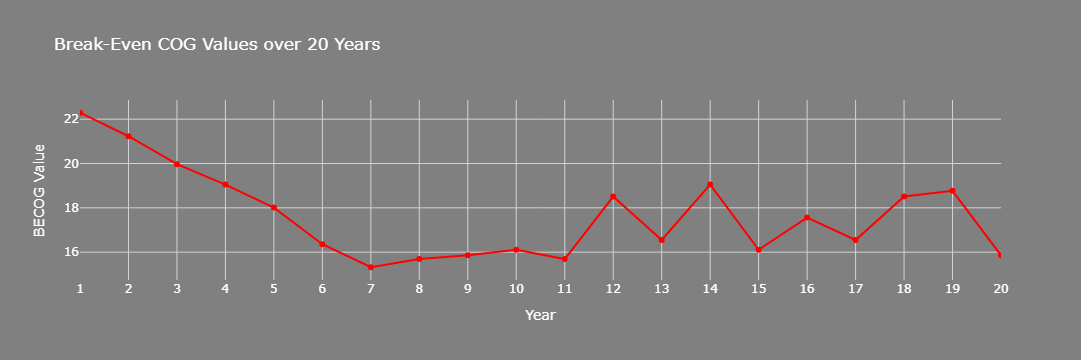

In [38]:
becog = [22.29, 21.23, 19.97, 19.05, 18.01, 16.36, 15.32, 15.69, 15.86, 16.11,15.69, 18.51, 16.55, 19.05, 16.11, 17.56, 16.55, 18.51, 18.77, 15.86]

min_value = min(becog)
max_value = max(becog)
average_value = sum(becog) / len(becog)
print("-------------------------------")
print(f"Minimum değer: {min_value}")
print(f"Maksimum değer: {max_value}")
print(f"Ortalama değer: {average_value}")
print("-------------------------------")
import plotly.graph_objects as go

years = list(range(1, 21))

fig = go.Figure()
fig.add_trace(go.Scatter(x=years, y=becog, mode='markers+lines', name='BECOG Values', line=dict(color='red')))
fig.update_layout(title='Break-Even COG Values over 20 Years',xaxis_title='Year',yaxis_title='BECOG Value',xaxis=dict(tickmode='linear', tick0=1, dtick=1, range=[1, 20]),plot_bgcolor='grey',paper_bgcolor='grey',width=1000,font=dict(color='white'),xaxis_gridcolor='lightgray',yaxis_gridcolor='lightgray')
fig.show()

In [39]:
# Ores with a BECOG value below the average of 17 were removed from the ore_data list
becog_update = [
    (19, 157920), (21, 180480), (23, 254928), (25, 275232), (27, 348160), 
    (29, 564000), (31, 789600), (33, 726432), (35, 815200), (37, 880960),
    (39, 858800), (41, 820400), (43, 757280), (45, 630848), (47, 557920), 
    (49, 380480), (51, 210880), (53, 238400), (55, 104560), (57, 106080),
    (59, 82000)]

# Calculate total tonnage and total grade * tonnage
total_t = sum([tonnage for grade, tonnage in becog_update])
total_g_t = sum([grade * tonnage for grade, tonnage in becog_update])

# Calculate average grade
a_grade = total_g_t / total_t

# Calculate metal content
m_content = total_t * (a_grade / 100)

# Print the results
print("-------------------------------")
print(f"Total tonnage: {total_t:,.0f}")
print(f"Average grade: % {a_grade:,.0f}")
print(f"Metal content: {m_content:,.0f} ton")
print("-------------------------------")

-------------------------------
Total tonnage: 9,740,560
Average grade: % 38
Metal content: 3,678,404 ton
-------------------------------


## DISCOUNTED VALUES OF ORE SALES PRICES
---
The primary goal of COG Optimization is to maximize Net Present Value (NPV). There are two main tactics to achieve this. The first tactic is to prioritize high-grade, high-yield production in the initial years. The second tactic involves prioritizing high-grade, high-yield production during periods of high revenue. To properly assess the significance of future price trends, it is necessary to discount them to their present value. For instance, is a unit price of 120 USD in year 7 more favorable than a price of 100 USD in year 2?

**As can be clearly seen in the graph below, a unit price of  120 USD in year 11 is significantly less valuable than a price of 75 USD in year 2.**


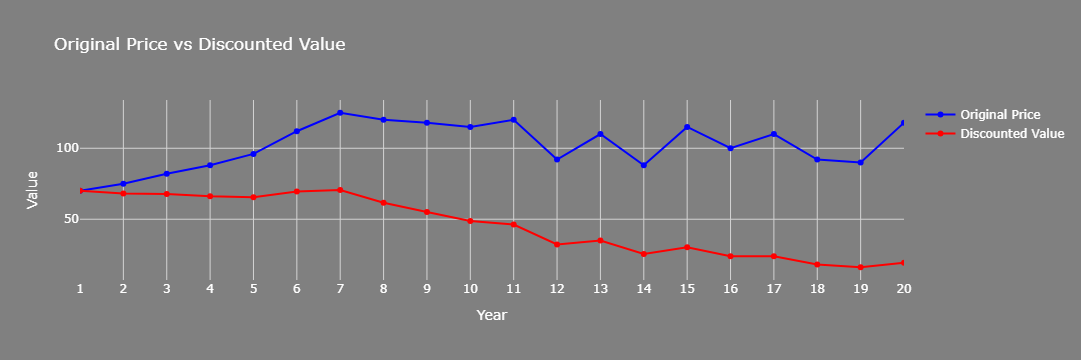

In [40]:
price = [70, 75, 82, 88, 96, 112, 125, 120, 118, 115, 120, 92, 110, 88, 115, 100, 110, 92, 90, 118]
years = list(range(1, len(price) + 1))
df_price = pd.DataFrame({'Year': years, 'price': price})
discount_rate = 0.10
def calculate_discounted_npv(prices, discount_rate):
    discounted_values = []
    for t in range(len(prices)):
        discounted_value = prices[t] / (1 + discount_rate) ** t
        discounted_values.append(discounted_value)
    return discounted_values

discounted_values = calculate_discounted_npv(price, discount_rate)
df_dis_price = pd.DataFrame({'Year': years,'price': price,'Discounted Value': discounted_values})

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_dis_price['Year'],y=df_dis_price['price'],mode='markers+lines',name='Original Price',line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_dis_price['Year'],y=df_dis_price['Discounted Value'],mode='markers+lines',name='Discounted Value',line=dict(color='red')))
fig.update_layout(title='Original Price vs Discounted Value',xaxis_title='Year',yaxis_title='Value',xaxis=dict(tickmode='linear',tick0=1,dtick=1,range=[1, 20]),
plot_bgcolor='grey',paper_bgcolor='grey',width=1000,font=dict(color='white'),xaxis_gridcolor='lightgray',yaxis_gridcolor='lightgray')
fig.show()

In [41]:
data = {
    'time': range(1, 21),  # 20 yıllık zaman dilimi
    'discounted_values': [70.00, 68.181818, 67.768595, 66.115702, 65.569292, 69.543188, 70.559241, 61.578974, 55.047871, 
                          48.771226,46.265195, 32.245439, 35.049390, 25.490465, 30.283094,23.939205, 23.939205, 18.201710, 16.187291, 19.293943]}

discounted_data= pd.DataFrame(data)

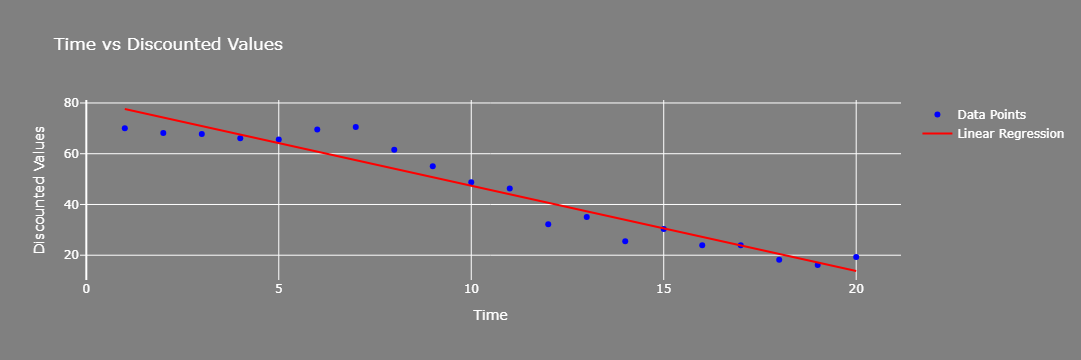

-------------------------------
R^2 Score: 0.922
-------------------------------


In [42]:
X = discounted_data[['time']]
y = discounted_data['discounted_values']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

fig = go.Figure()

# Scatter plot
fig.add_trace(go.Scatter(x=discounted_data['time'], y=discounted_data['discounted_values'],mode='markers', name='Data Points',marker=dict(color='blue')))
fig.add_trace(go.Scatter(x=discounted_data['time'], y=y_pred,mode='lines', name='Linear Regression', line=dict(color='red')))
fig.update_layout(title='Time vs Discounted Values',xaxis_title='Time',yaxis_title='Discounted Values',plot_bgcolor='gray', paper_bgcolor='grey',width=1000,font=dict(color='white'))
fig.update_xaxes(title_font=dict(color='white'), tickfont=dict(color='white'))
fig.update_yaxes(title_font=dict(color='white'), tickfont=dict(color='white'))
fig.show()

# R^2
r2_score = model.score(X, y)
print("-------------------------------")
print(f'R^2 Score: {r2_score:.3f}')
print("-------------------------------")

## POLYNOMIAL LINEAR REGRESSION FOR PREDICTING METAL CONTENT IN ORE
---

We used 6th-degree polynomial features with PolynomialFeatures to expand the data. Then, we trained a LinearRegression model with these expanded features and made predictions. To evaluate the model, we calculated the area under the curve using the Trapezoid Rule. Finally, we scaled the predicted y values to match the desired total metal content in the ore and rounded the results. This process involved expanding data with polynomial features, training the model, calculating the area under the curve, and scaling the predictions to align with a specific total metal content.

In [64]:
# Data preparation
data = {
    'time': range(1, 21),
    'discounted_values': [70.0, 68.181818, 67.768595, 66.115702, 65.569292,
                          69.543188, 70.559241, 61.578974, 55.047871, 48.771226, 
                          46.265195, 32.245439, 35.049390, 25.490465, 30.283094,
                          23.939205, 23.939205, 18.201710, 16.187291, 19.293943]}

discounted_data = pd.DataFrame(data)

# Create polynomial features (6th degree polynomial)
poly = PolynomialFeatures(degree=6)
X_poly = poly.fit_transform(discounted_data[['time']])

# Create and train polynomial regression model
model = LinearRegression()
model.fit(X_poly, discounted_data['discounted_values'])
y_pred = model.predict(X_poly)

# Calculate area under the curve (simpson integration)
area_under_curve = simps(y_pred, discounted_data['time'])

# Total metal content in the ore
desired_area = m_content

scaling_factor = desired_area/ area_under_curve
y_scaled = y_pred * scaling_factor

y_scaled_rounded = [round(num, 2) for num in y_scaled]

# Divide by the annual production figure of 500000
y_final = [round(num*0.85/ 5000, 2) for num in y_scaled_rounded]
print(f'COG: {y_final}')

# Calculate MAE
mae = mean_absolute_error(discounted_data['discounted_values'], y_pred)
print(f'Mean Absolute Error (MAE): {mae:.2f}')

# Calculate MSE
mse = mean_squared_error(discounted_data['discounted_values'], y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

COG: [51.43, 47.29, 47.58, 49.16, 50.19, 49.78, 47.76, 44.36, 40.06, 35.43, 30.95, 27.0, 23.75, 21.18, 19.14, 17.38, 15.7, 14.08, 12.9, 13.15]
Mean Absolute Error (MAE): 2.11
Mean Squared Error (MSE): 6.69


## PRODUCTION IS MADE WITH THE VALUES OBTAINED BY Cut Off Grade OPTIMIZATION.
---

In [69]:
# Production ton value
initial_annual_production_ton = 500000
COG_values = y_final


def calculate_yield(grade):
    return (-0.0004 * (grade ** 3)) + (0.0461 * (grade ** 2)) - (0.1765 * grade) + 0.72

def calculate_product(annual_ton, average_grade):
    yield_value = calculate_yield(average_grade) / 100
    product = annual_ton * yield_value
    return product

def calculate_cost(grade):
    return 0.1 * grade + 3.7

def calculate_mining_cost(annual_production):
    return (((-0.1 * (annual_production / 100000)) + 8.5) * annual_production)

def calculate_revenue(product_amounts, ore_prices):
    revenue_results = []
    total_revenue = 0
    for i, (year, annual_production_ton, avg_grade, yield_percentage, product_amount, _, _) in enumerate(product_amounts):
        price = ore_prices[i % len(ore_prices)]
        revenue = product_amount * price
        total_revenue += revenue
        revenue_results.append((year, round(avg_grade, 1), round(yield_percentage, 1), int(product_amount), int(revenue)))
    return revenue_results, total_revenue

def calculate_new_investment_cost(existing_cost, existing_capacity, initial_annual_production_ton, factor=0.6):
    new_cost = existing_cost * (initial_annual_production_ton / existing_capacity) ** factor
    return new_cost

def calculate_annual_payment(principal, annual_interest_rate, years):
    r = annual_interest_rate / 100
    n = years
    annual_payment = (principal * r) / (1 - (1 + r) ** -n)
    return annual_payment

def calculate_npv_for_production_ton(initial_annual_production_ton, COG_values):
    years_of_production = len(COG_values)
    results = []

    for year in range(1, years_of_production + 1):
        annual_production_ton = initial_annual_production_ton
        average_grade = COG_values[year - 1]
        results.append((year, annual_production_ton, round(average_grade, 1)))

    product_results = []

    for year, annual_production_ton, average_grade in results:
        yield_value = calculate_yield(average_grade) / 100
        product = calculate_product(annual_production_ton, average_grade)
        p_cost = calculate_cost(average_grade) * product
        mining_cost = calculate_mining_cost(annual_production_ton)
        product_results.append((year, annual_production_ton, round(average_grade, 1), round(yield_value * 100, 1), int(product), int(p_cost), int(mining_cost)))

    ore_prices = [70, 75, 82, 88, 96, 112, 125, 120, 118, 115, 120, 92, 110, 88, 115, 100, 110, 92, 90, 118]
    revenue_results, total_revenue = calculate_revenue(product_results, ore_prices)

    existing_investment_cost = 10000000
    existing_capacity = 500000
    new_investment_cost = calculate_new_investment_cost(existing_investment_cost, existing_capacity, initial_annual_production_ton)

    principal = new_investment_cost
    annual_interest_rate = 5
    years = 4
    annual_payment = calculate_annual_payment(new_investment_cost, annual_interest_rate, years)

    processing_costs = [p_cost for _, _, _, _, _, p_cost, _ in product_results]
    mining_costs = [m_cost for _, _, _, _, _, _, m_cost in product_results]
    waste_rock_costs = [15000000 / len(product_results)] * len(product_results)

    net_income_results = []
    for i, (year, avg_grade, yield_percentage, product_amount, revenue) in enumerate(revenue_results):
        net_income = revenue - processing_costs[i] - mining_costs[i] - waste_rock_costs[i] if i < 4 else revenue - processing_costs[i] - mining_costs[i] - waste_rock_costs[i]
        net_income_results.append((year, avg_grade, yield_percentage, product_amount, revenue, int(net_income)))

    npv = 0
    discount_rate = 0.1

    for i in range(len(net_income_results)):
        discounted_net_income = net_income_results[i][5]
        npv += discounted_net_income / (1 + discount_rate) ** (i)

    net_present_value = npv - new_investment_cost
    return net_present_value

# Production ton value
npv = calculate_npv_for_production_ton(initial_annual_production_ton, COG_values)

print()
print(f"Minimum NPV: {min_npv:,.0f}")
print(f"Maximum NPV: {max_npv:,.0f}")
print(f"Mean NPV: {mean_npv:,.0f}")
print()
print("--------------------------------------------------------")
print(f" Net Present Value by COG Optimization: {npv:,.0f} USD")
print("--------------------------------------------------------")


Minimum NPV: 68,249,916
Maximum NPV: 97,665,922
Mean NPV: 83,620,693

--------------------------------------------------------
 Net Present Value by COG Optimization: 117,286,519 USD
--------------------------------------------------------
